/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               Age        Salary  Total Salary         Price
Segment                                                     
0        29.434783  1.226087e+06  1.495652e+06  1.083043e+06
1        41.843750  2.496875e+06  3.440625e+06  1.534375e+06
2        35.886364  1.450000e+06  1.825000e+06  1.004545e+06


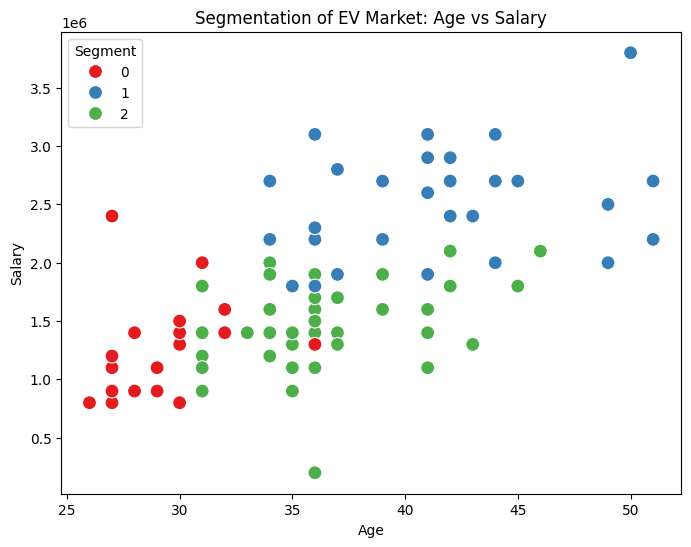

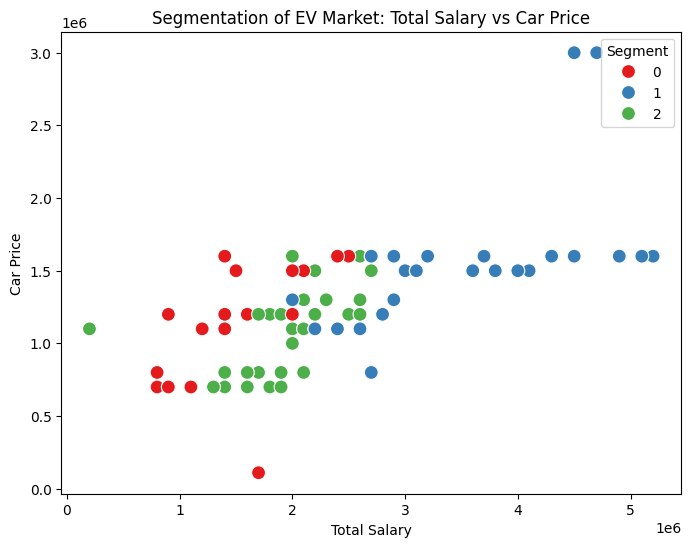

<Figure size 1000x600 with 0 Axes>

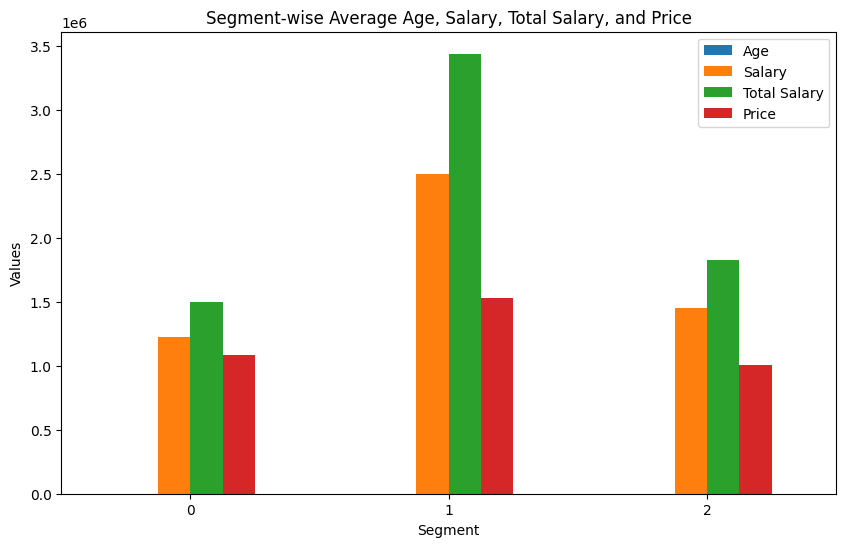

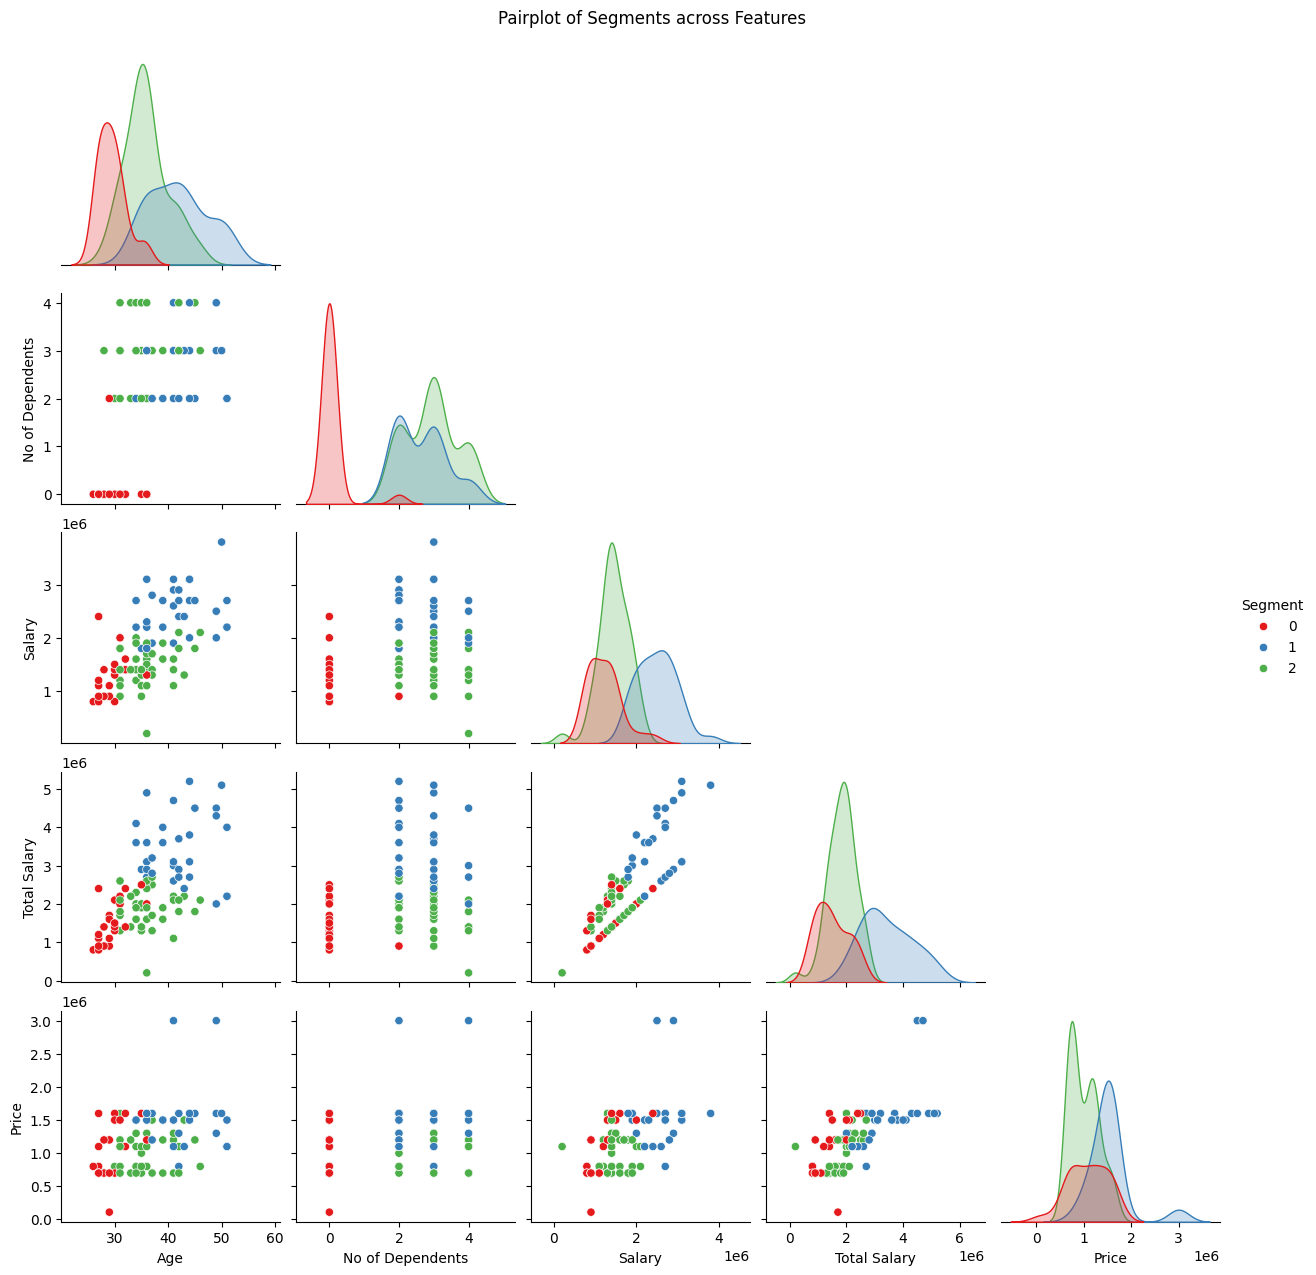

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Selecting relevant features for segmentation
features = ['Age', 'No of Dependents', 'Salary', 'Total Salary', 'Price']

# Preprocessing: Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Using KMeans for segmentation (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

# Analyzing the segmentation
segment_summary = df.groupby('Segment')[['Age', 'Salary', 'Total Salary', 'Price']].mean()
print(segment_summary)

# Visualizing the clusters in 2D space for 'Age' vs 'Salary'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Segment', data=df, palette='Set1', s=100)
plt.title('Segmentation of EV Market: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# Visualizing the clusters in 2D space for 'Total Salary' vs 'Price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Salary', y='Price', hue='Segment', data=df, palette='Set1', s=100)
plt.title('Segmentation of EV Market: Total Salary vs Car Price')
plt.xlabel('Total Salary')
plt.ylabel('Car Price')
plt.show()

# Plotting bar graphs to compare average segment values
plt.figure(figsize=(10, 6))
segment_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Segment-wise Average Age, Salary, Total Salary, and Price')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

# Visualizing cluster distribution using pairplot for multiple features
sns.pairplot(df, hue="Segment", vars=features, palette="Set1", corner=True)
plt.suptitle('Pairplot of Segments across Features', y=1.02)
plt.show()

